# Data Mining Final Project - Notebook 1
### Datasets :
   > ### Car Evaluation Dataset
   > ### Wine Quality Dataset (White)
### Authors:
> ### Francisco Cunha, 76759
> ### João Amaral, 76460

The following notebook containts the development stages of the analysis and classifier modeling of a dataset, done for the final project of the course 44152 - Data Mining at University of Aveiro.
The project requested that the students selected two different datasets and apply common data mining techniques in order to extract patterns and predict behavior in the studied data (train classifiers). The students were required to freely select two datasets to develop the project, the only restriction being one of them had to contain some sort of categorical attributes. The first dataset chosen was the the Car Evaluation Dataset, containing categorical attributes, which is available at https://archive.ics.uci.edu/ml/datasets/Car+Evaluation. The second dataset chosen was the Wine Quality Dataset, available at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. It contains two datasets one for red and other for white whine. The white wine one was then chosen.

The assignment of the project required the delivery of two notebooks, one containing only the data pre-processing and classifier modeling for both chosen datasets, while the second contains the complete processing including a cross validation scheme implementation and the justification for its selection.

This notebook corresponds to the first one, and as such, the notebook is then divided into 2 main stages, corresponding to the data mining stages we already studied in the theorethical classes:
    - Task A : Pre-processing stage
    - Task B : Training model stage
    
In order to ease the reading of the notebook, both tasks were applied separately to each dataset and here displayed in two separate sections:
- [Dataset 1: Car Evaluation Dataset](#Dataset-1-:-Car-Evaluation-Dataset)
    - [Task A: Car Pre-processing](#Task-A:-Car-Pre-processing)
    - [Task B: Car Model training](#Task-B:-Car-Model-training)
- [Dataset 2: White wine quality dataset](#Dataset-2-:-White-wine-quality-dataset)
    - [Task A: Wine Pre-processing](#Task-A:-Wine-Pre-processing)
    - [Task B: Wine Model Training](#Task-B:-Wine-Model-Training)

# Dataset 1 : Car Evaluation Dataset
## Task A: Car Pre-processing 

- [CSV's File Reading](#CSV's-File-Reading)
- [Attributes and classes sample values](#Attributes-and-classes-sample-values)
- [Mapping categorial attributes to numeric](#Mapping-categorial-attributes-to-numeric)
- [Class distribution visualization](#Class-distribution-visualization)
- [Dataset detailed description](#Dataset-detailed-description)
- [Attribute and class plotting examples](#Attribute-and-class-plotting-examples)
- [Correlation matrix heatmap](#Correlation-matrix-heatmap)
- [Feature ranking (Shapiro-Wilk)](#Feature-ranking-(Shapiro-Wilk))
- [Feature scaling](#Feature-scaling)

### CSV's File Reading

In [1]:
import os
import pandas as pd
from pandas import DataFrame

#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Load dataframes from data set CSV files
dataset_car = pd.read_csv('./car.csv') # categorical: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

### Attributes and classes sample values

In [2]:
dataset_car.head() # shows only the first 5 instances on the data set

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Mapping categorical attributes to numeric 

In [3]:
# Dictionary containing the mapping to be done in order 
# to convert categorical attributes to numeric ones
# Not the most efficient method but we decide to which
# numerical value each attribue will be converted to
numeric_map = {
	'buying' : { 'low' : 1, 'med' : 2, 'high' : 3, 'vhigh': 4 },
	'maint' : {'low' : 1, 'med' : 2, 'high' : 3, 'vhigh': 4 },
	'doors' : { '2' : 1, '3' : 2, '4' : 3, '5more' : 4 },
	'persons' : {'2' : 1, '4' : 2, 'more' : 3 },
	'lug_boot' : {'small' : 1,'med': 2, 'big': 3 },
	'safety' : {'low' : 1, 'med' : 2, 'high': 3 }
}

for m in numeric_map:
	dataset_car[m] = dataset_car[m].map(numeric_map[m])

# classes values mapping to numeric values
dataset_car['class values'].replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

dataset_car.head()

,buying,maint,doors,persons,lug_boot,safety,class values
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


### Class distribution visualization

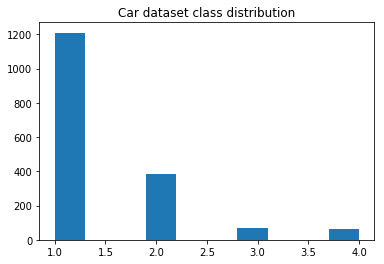

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt 

plt.hist(dataset_car['class values'])
plt.title('Car dataset class distribution')
plt.show()

### Dataset detailed description

Dataset description
              buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      2.500000     2.500000     2.500000     2.000000     2.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.750000     1.750000     1.750000     1.000000     1.000000   
50%       2.500000     2.500000     2.500000     2.000000     2.000000   
75%       3.250000     3.250000     3.250000     3.000000     3.000000   
max       4.000000     4.000000     4.000000     3.000000     3.000000   

            safety  class values  
count  1728.000000   1728.000000  
mean      2.000000      1.414931  
std       0.816733      0.740700  
min       1.000000      1.000000  
25%       1.000000      1.000000  
50%       2.000000      1.000000  
75%       3.000000      2.000000  
max       3.000000      4.00000

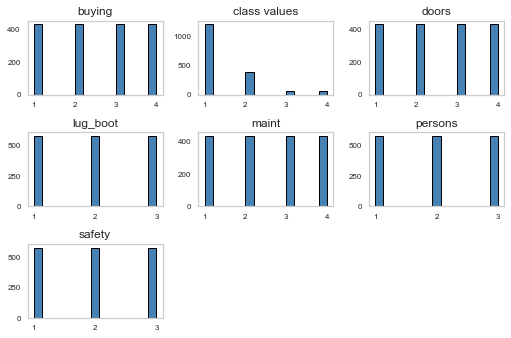

In [80]:
print("Dataset description\n ", dataset_car.describe())
print()

dataset_car.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### Attribute and class plotting examples

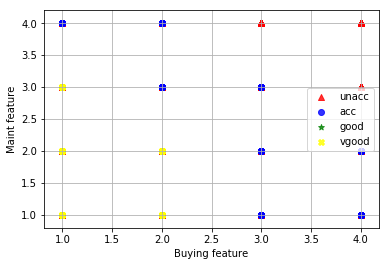

In [6]:
labels_car = dataset_car.as_matrix(columns=[dataset_car.columns[-1]]) # Y
attributes_car = dataset_car.as_matrix(columns=dataset_car.columns[0:6]) # X
labels_car = labels_car.reshape(labels_car.size)

plt.scatter(attributes_car[labels_car==1, 0],attributes_car[labels_car==1,1], color='red', marker='^', alpha=0.8)
plt.scatter(attributes_car[labels_car==2, 0],attributes_car[labels_car==2,1], color='blue', marker='o', alpha=0.8)
plt.scatter(attributes_car[labels_car==3, 0],attributes_car[labels_car==3,1], color='green', marker='*', alpha=0.8)
plt.scatter(attributes_car[labels_car==4, 0],attributes_car[labels_car==4,1], color='yellow', marker='X', alpha=0.8)
plt.xlabel("Buying feature")
plt.ylabel("Maint feature")
plt.legend(["unacc", "acc", "good", "vgood"])
plt.grid()
plt.show()

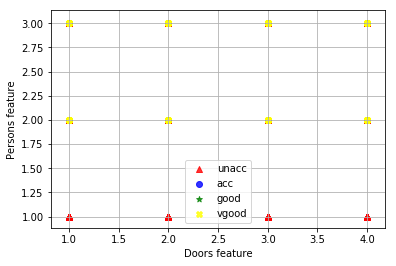

In [7]:
plt.scatter(attributes_car[labels_car==1, 2],attributes_car[labels_car==1,3], color='red', marker='^', alpha=0.8)
plt.scatter(attributes_car[labels_car==2, 2],attributes_car[labels_car==2,3], color='blue', marker='o', alpha=0.8)
plt.scatter(attributes_car[labels_car==3, 2],attributes_car[labels_car==3,3], color='green', marker='*', alpha=0.8)
plt.scatter(attributes_car[labels_car==4, 2],attributes_car[labels_car==4,3], color='yellow', marker='X', alpha=0.8)
plt.xlabel("Doors feature")
plt.ylabel("Persons feature")
plt.legend(["unacc", "acc", "good", "vgood"])
plt.grid()
plt.show()

### Correlation matrix heatmap

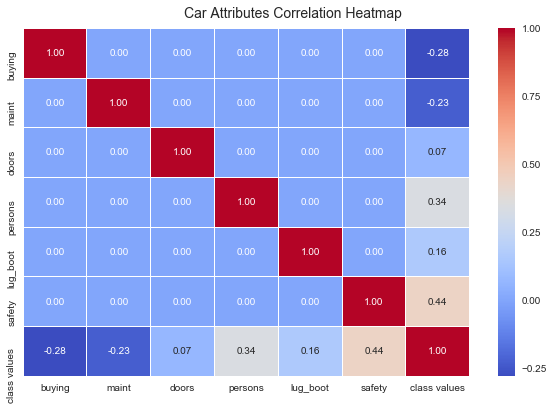

In [102]:
import seaborn as sns

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset_car.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Car Attributes Correlation Heatmap', fontsize=14)

### Feature ranking (Shapiro-Wilk)

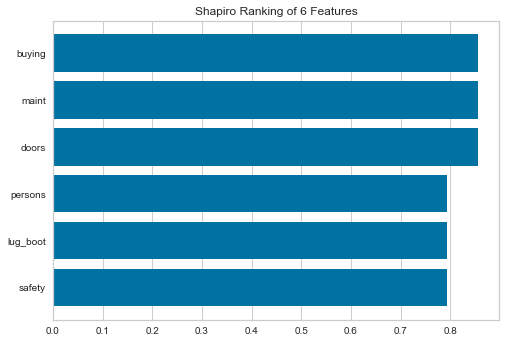

In [8]:
from yellowbrick.features import Rank1D

features = list(dataset_car.columns[0:6])

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit(attributes_car, labels_car)	# Fit the data to the visualizer
visualizer.transform(attributes_car)	# Transform the data
visualizer.poof()

### Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

sc = StandardScaler()
sc.fit(attributes_car)
X_train_std = sc.transform(attributes_car)

## Task B: Car Model training 

- [Dataset partition](#Dataset-partition)
- [SVM classfiers](#SVM-classifiers)
    - [SVM linear kernel](#SVM-linear-kernel)
    - [SVM polynomial kernel](#SVM-polynomial-kernel)
    - [SVM rbf kernel](#SVM-rbf-kernel)
    - [SVM sigmoid kernel](#SVM-sigmoid-kernel)
- [Multi-layer Perceptron](#Multi-layer-Perceptron)
- [K-Nearest Neighbors](#K-Nearest-Neighbors)
- [Decision tree](#Decision-tree)
- [Random forest](#Random-forest)
- [Gradient boosting](#Gradient-boosting)
- [Preliminary results](#Preliminary-results)

### Dataset partition

In [10]:
from sklearn.model_selection import train_test_split
#holdout dataset partition
# 70% of dataset used for training the model
# 30% of dataset used to test the model
test_frac = 0.3
X_train,X_test,Y_train,Y_test = train_test_split(X_train_std,labels_car, test_size = test_frac)

### SVM classifiers

#### SVM linear kernel

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_lin_score = accuracy_score(Y_test, predictions)
print('Linear SVM Accuracy: {:.2%}'.format(svm_lin_score))


Linear SVM Accuracy: 84.78%


#### SVM polynomial kernel

In [12]:
svc = SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_poly_score = accuracy_score(Y_test, predictions)
print('Polynomial SVM Accuracy: {:.2%}'.format(svm_poly_score))

Polynomial SVM Accuracy: 68.98%


#### SVM rbf kernel

In [13]:
svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_rbf_score = accuracy_score(Y_test, predictions)
print('RBF SVM Accuracy: {:.2%}'.format(svm_rbf_score))

RBF SVM Accuracy: 95.18%


#### SVM sigmoid kernel

In [14]:
svc = SVC(kernel='sigmoid', C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_sigm_score = accuracy_score(Y_test, predictions)
print('Sigmoid SVM Accuracy: {:.2%}'.format(svm_sigm_score))

Sigmoid SVM Accuracy: 71.68%


### Multi-layer Perceptron

In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5),alpha=0.01, max_iter=5000)
mlp.fit(X_train, Y_train)
predictions = mlp.predict(X_test)
mlp_score = accuracy_score(Y_test, predictions)
print('MLP Accuracy: {:.2%}'.format(mlp_score))

MLP Accuracy: 96.92%


### K-Nearest Neighbors 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')
predictions = knn.predict(X_test)
knn_score = accuracy_score(Y_test, predictions)
print("KNN Accuracy: {:.2%}".format(knn_score))

KNN Accuracy: 91.91%


### Decision tree

In [17]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(criterion='gini')
tree.fit(X_train,Y_train)
tree_score = tree.score(X_test,Y_test)
print('Decision Tree Accuracy: {:.2%}'.format(tree_score))

Decision Tree Accuracy: 97.11%


### Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=10, max_features='log2', oob_score=False)	
forest.fit(X_train,Y_train)
rf_score = forest.score(X_test,Y_test)
print('Random Forest Accuracy: {:.2%}'.format(rf_score))

Random Forest Accuracy: 81.89%


### Gradient boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, Y_train)
gb_score = clf.score(X_test, Y_test)  
print('Gradient Boosting Accuracy: {:.2%}'.format(gb_score))

Gradient Boosting Accuracy: 91.91%


### Preliminary results

In [65]:
from IPython.display import HTML, display

data = [['Classifier','Accuracy results'],
        ['SVM Linear', svm_lin_score],
        ['SVM Polynomial',svm_poly_score],
        ['SVM RBF',svm_rbf_score],
        ['SVM Sigmoid',svm_sigm_score],
        ['MLP', mlp_score],
        ['KNN', knn_score,],
        ['Decision tree', tree_score],
        ['Random forest', rf_score],
        ['Gradient boosting', gb_score]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
)))

Classifier,Accuracy results
SVM Linear,0.847784200385
SVM Polynomial,0.68978805395
SVM RBF,0.95183044316
SVM Sigmoid,0.71676300578
MLP,0.969171483622
KNN,0.919075144509
Decision tree,0.971098265896
Random forest,0.818882466281
Gradient boosting,0.919075144509


# Dataset 2 : White wine quality dataset

## Task A: Wine Pre-processing 

- [Wine CSV's File Reading](#Wine-CSV's-File-Reading)
- [Wine Attributes and classes sample values](#Wine-Attributes-and-classes-sample-values)
- [Wine Class distribution visualization](#Wine-Class-distribution-visualization)
- [Wine Dataset detailed description](#Wine-Dataset-detailed-description)
- [Wine Attribute and class plotting examples](#Wine-Attribute-and-class-plotting-examples)
- [Wine Feature ranking (Shapiro-Wilk)](#Wine-Feature-ranking-(Shapiro-Wilk))
- [Wine feature scaling](#Wine-feature-scaling)
- [Wine dimension reduction](#Wine-dimension-reduction)
    - [Principal Component Analysis (PCA)](#Principal-Component-Analysis-(PCA))
    - [Kernel PCA](#Kernel-PCA)

### Wine CSV's File Reading

In [66]:
# Load dataframes from data set CSV files
dataset_white = pd.read_csv('./white_wine.csv') # numerical: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

### Wine Attributes and classes sample values

In [67]:
dataset_white.head() # shows only the first 5 instances on the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Wine Class distribution visualization

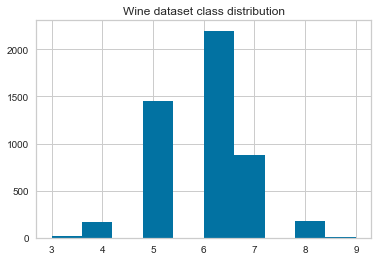

In [71]:
plt.hist(dataset_white['quality'])
plt.title('Wine dataset class distribution')
plt.show()

### Wine Dataset detailed description

Dataset description
         fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000        

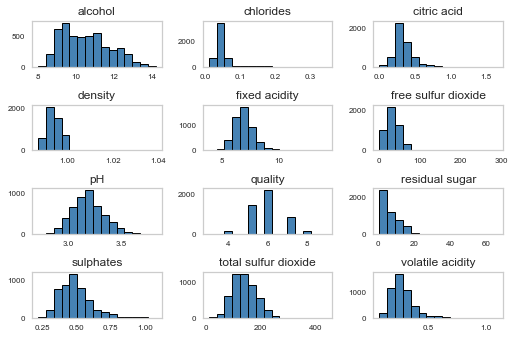

In [77]:
print("Dataset description\n ", dataset_white.describe())
print()

dataset_white.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### Wine Attribute and class plotting examples

c:\users\utilizador\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


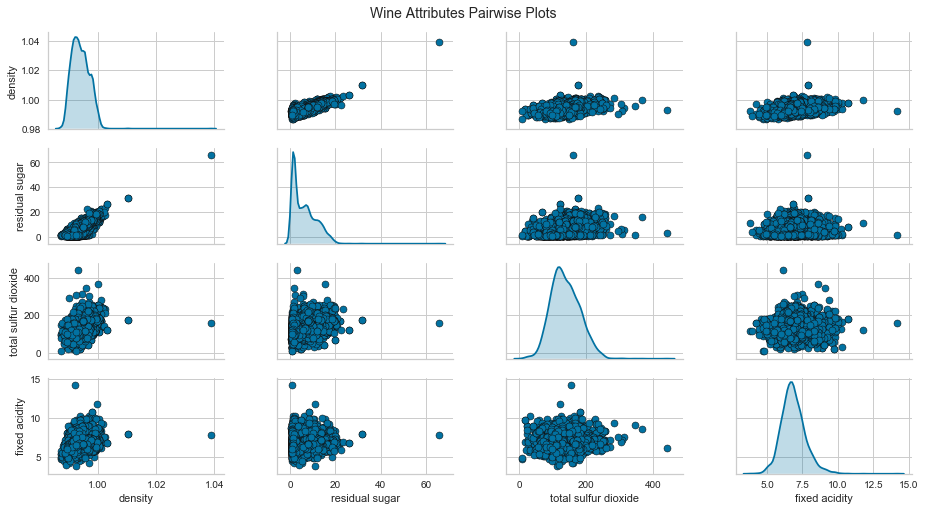

In [109]:
labels_wine = dataset_white.as_matrix(columns=[dataset_white.columns[-1]]) # Y
attributes_wine = dataset_white.as_matrix(columns=dataset_white.columns[0:10]) # X
labels_wine = labels_wine.reshape(labels_wine.size)

# Pair-wise Scatter Plots
cols = ['density', 'residual sugar', 'total sulfur dioxide', 'fixed acidity']
pp = sns.pairplot(dataset_white[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

### Correlation matrix heatmap

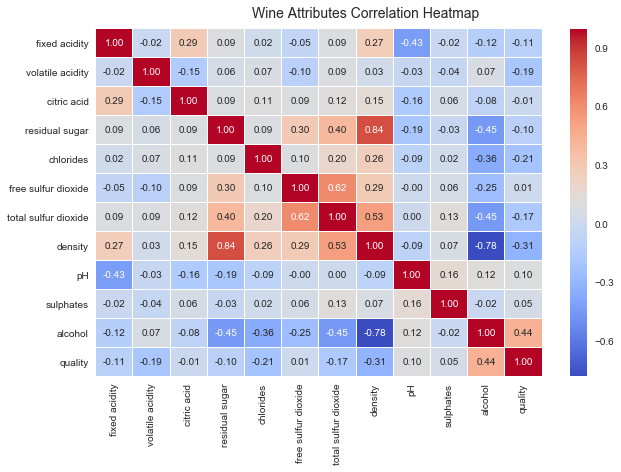

In [108]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset_white.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

### Wine Feature ranking (Shapiro-Wilk)

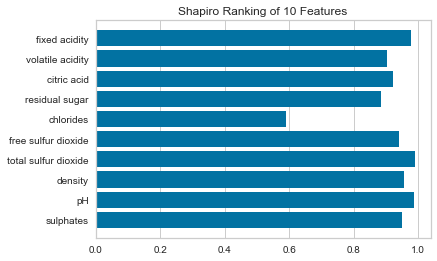

In [104]:
features = list(dataset_white.columns[0:10])
# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit(attributes_wine, labels_wine)	# Fit the data to the visualizer
visualizer.transform(attributes_wine)	# Transform the data
visualizer.poof()

### Wine feature scaling

In [113]:
sc = StandardScaler()
sc.fit(attributes_wine)
X_train_std = sc.transform(attributes_wine)

### Wine dimension reduction

#### Principal Component Analysis (PCA)

#### Kernel PCA

## Task B: Wine Model Training

- [Dataset partition](#Dataset-partition)
- [SVM classfiers](#SVM-classifiers)
    - [SVM linear kernel](#SVM-linear-kernel)
    - [SVM polynomial kernel](#SVM-polynomial-kernel)
    - [SVM rbf kernel](#SVM-rbf-kernel)
    - [SVM sigmoid kernel](#SVM-sigmoid-kernel)
- [Multi-layer Perceptron](#Multi-layer-Perceptron)
- [K-Nearest Neighbors](#K-Nearest-Neighbors)
- [Decision tree](#Decision-tree)
- [Random forest](#Random-forest)
- [Gradient boosting](#Gradient-boosting)
- [Preliminary results](#Preliminary-results)

## CSV's File Reading

In [20]:
import os
import pandas as pd
from pandas import DataFrame

#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

'''
# gets current working directory
cwd = os.getcwd()
# splits cwd by Data_Mining/
dm = cwd.split('Data_Mining/')
# datasets path
datasets_path = dm[0] + "Data_Mining/Datasets/"

# Assign spreadsheet filename to 'car_path' and 'white_path'
car_path = (datasets_path + "car.csv") 
white_path = (datasets_path + "white_wine.csv") # 

dataset_car = pd.read_csv(car_path) 
dataset_white = pd.read_csv(white_path) 
'''

# Load dataframes from data set CSV files
try:
    dataset_car = pd.read_csv('./car.csv') # categorical: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
    dataset_white = pd.read_csv('./white_wine.csv') # numerical: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
except Exception as ex:
    print("Error while opening the file\n\t{}".format(ex))

Car dataset attributes sample

In [21]:
dataset_car.head() # shows only the first 5 instances on the data set

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


White whine dataset attributes sample

In [22]:
dataset_white.head() # shows only the first 5 instances on the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


##  Mapping categorial data into numeric data (Car data set)

In [23]:
# https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe
# http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/

# converts dtype category to binary according 2nd link
Y_car = pd.get_dummies(dataset_car[['class values']])
Y_car.head() # shows only the first 5 instances on the data set

,class values_acc,class values_good,class values_unacc,class values_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [24]:
X_car = dataset_car.drop('class values', 1)  
X_car = pd.get_dummies(X_car)
X_car.head() # shows only the first 5 instances on the data set

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


## Class distribution visualization

In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt 

## Não estava a conseguir dar plot à distribuição das classes com 
## o mapeamento que fizeste de cima por isso pus aqui como eu 
## tinha mapeado os dados para facilitar

numeric_map = {
	'buying' : { 'low' : 1, 'med' : 2, 'high' : 3, 'vhigh': 4 },
	'maint' : {'low' : 1, 'med' : 2, 'high' : 3, 'vhigh': 4 },
	'doors' : { '2' : 1, '3' : 2, '4' : 3, '5more' : 4 },
	'persons' : {'2' : 1, '4' : 2, 'more' : 3 },
	'lug_boot' : {'small' : 1,'med': 2, 'big': 3 },
	'safety' : {'low' : 1, 'med' : 2, 'high': 3 }
}

for m in numeric_map:
	dataset_car[m] = dataset_car[m].map(numeric_map[m])

dataset_car['class values'].replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [26]:
def visualizeDataHist(dataset, y_label, title):
    a = dataset[y_label]
    plt.hist(a)
    plt.title(title)
    plt.show()
    #plt.clf()

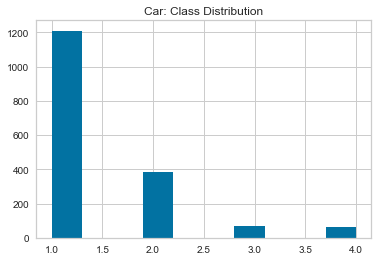

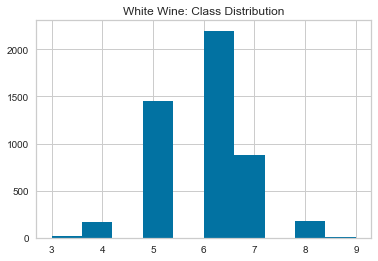

In [27]:
visualizeDataHist(dataset_car, 'class values', 'Car: Class Distribution')
visualizeDataHist(dataset_white, 'quality', 'White Wine: Class Distribution')

## Data set detailed description (Car)

Dataset description
              buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      2.500000     2.500000     2.500000     2.000000     2.000000   
std       1.118358     1.118358     1.118358     0.816733     0.816733   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%       1.750000     1.750000     1.750000     1.000000     1.000000   
50%       2.500000     2.500000     2.500000     2.000000     2.000000   
75%       3.250000     3.250000     3.250000     3.000000     3.000000   
max       4.000000     4.000000     4.000000     3.000000     3.000000   

            safety  class values  
count  1728.000000   1728.000000  
mean      2.000000      1.414931  
std       0.816733      0.740700  
min       1.000000      1.000000  
25%       1.000000      1.000000  
50%       2.000000      1.000000  
75%       3.000000      2.000000  
max       3.000000      4.00000

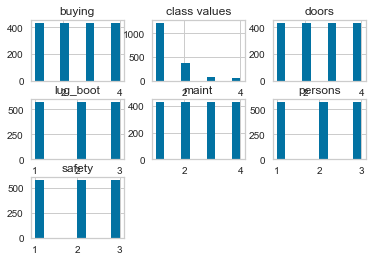

In [28]:
print("Dataset description\n ", dataset_car.describe())

dataset_car.hist()
plt.show()

## Data set detailed description (Wine)

Dataset description
         fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000        

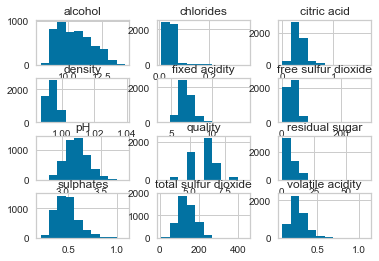

In [29]:
print("Dataset description\n ", dataset_white.describe())

dataset_white.hist()
plt.show()

## Ploting attributes and data

In [30]:
def plotAttributeData(data, labels):

	labels = labels.reshape(labels.size)
	
	plt.scatter(data[labels==1, 0],data[labels==1,1], color='red', marker='^', alpha=0.8)
	plt.scatter(data[labels==2, 0],data[labels==2,1], color='blue', marker='o', alpha=0.8)
	plt.scatter(data[labels==3, 0],data[labels==3,1], color='green', marker='*', alpha=0.8)
	plt.scatter(data[labels==4, 0],data[labels==4,1], color='yellow', marker='X', alpha=0.8)

	plt.grid()
	plt.show()

In [31]:
labels_car = dataset_car.as_matrix(columns=[dataset_car.columns[-1]]) # Y
attributes_car = dataset_car.as_matrix(columns=dataset_car.columns[0:6]) # X

labels_white = dataset_white.as_matrix(columns=[dataset_white.columns[-1]]) # Y
attributes_white = dataset_white.as_matrix(columns=dataset_white.columns[0:11]) # X

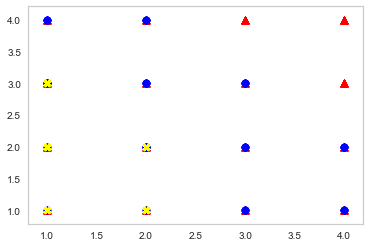

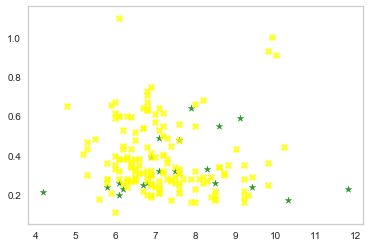

In [32]:
plotAttributeData(attributes_car, labels_car)
plotAttributeData(attributes_white, labels_white)

## Rank features

In [33]:
def featureRanking(dataset, y_label, attributes, labels):

    from yellowbrick.features import Rank1D
    
    # Instantiate the 1D visualizer with the Sharpiro ranking algorithm
    visualizer = Rank1D(features = dataset[y_label], algorithm='shapiro')
    visualizer.fit(attributes, labels)	# Fit the data to the visualizer
    visualizer.transform(attributes)	# Transform the data
    visualizer.poof()					# Draw/show/poof the data

### Categorical data set (Car)

CAR SHAPE OLD:  (1728, 21)

CAR INDICES:  [12 18 19]

CAR SHAPE NEW:  (1728, 3)

CAR FIT SCORES:  [  3.653e+01   8.682e+01   1.546e+01   5.043e+01   1.918e+01   5.787e+01
   1.546e+01   5.043e+01   6.867e+00   2.432e-01   1.637e+00   1.637e+00
   2.466e+02   6.952e+01   5.524e+01   2.065e+01   1.258e+00   3.137e+01
   1.735e+02   2.466e+02   5.924e+01]

CAR Features:  [[1 0 1]
 [1 0 0]
 [1 1 0]
 [1 0 1]]

CAR UNIVARIATE SELECTION:  (array([  3.653e+01,   8.682e+01,   1.546e+01,   5.043e+01,   1.918e+01,
         5.787e+01,   1.546e+01,   5.043e+01,   6.867e+00,   2.432e-01,
         1.637e+00,   1.637e+00,   2.466e+02,   6.952e+01,   5.524e+01,
         2.065e+01,   1.258e+00,   3.137e+01,   1.735e+02,   2.466e+02,
         5.924e+01]), array([  5.790e-08,   1.054e-18,   1.462e-03,   6.471e-11,   2.508e-04,
         1.677e-12,   1.462e-03,   6.471e-11,   7.627e-02,   9.703e-01,
         6.509e-01,   6.509e-01,   3.584e-53,   5.418e-15,   6.117e-12,
         1.244e-04,   7.392e-01,   7.

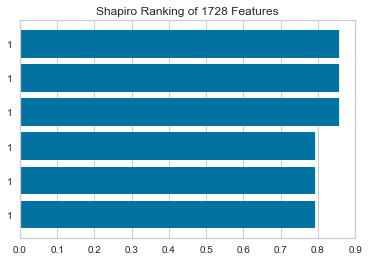

In [34]:
# https://machinelearningmastery.com/feature-selection-machine-learning-python/
from sklearn.feature_selection import SelectKBest, chi2
import numpy

# UNIVARIATE SELECTION -> Statistical tests can be used to select those features that have the strongest relationship with the output variable.

print("CAR SHAPE OLD: ", X_car.shape)

# feature extraction
test_car = SelectKBest(score_func = chi2, k = 3) # selects features using chi square and selects 3 of the best features
fit_car = test_car.fit(X_car, Y_car) # Run score function on (X, Y) and get the appropriate features.
indices_car = fit_car.get_support(indices='false') # Get a mask, or integer index, of the features selected
print("\nCAR INDICES: ", indices_car)

# new dataset
X_car_new = SelectKBest(chi2, k=3).fit_transform(X_car, Y_car)
print("\nCAR SHAPE NEW: ", X_car_new.shape)

# summarize scores 
numpy.set_printoptions(precision = 3) # sets precision to 3 numbers
print("\nCAR FIT SCORES: ", fit_car.scores_)

# Apply the transformation to the dataset
features_car = fit_car.transform(X_car)

# Summarize selected features
print("\nCAR Features: ", features_car[0:4,:])

uni_selection_car = chi2(X_car, Y_car) # MAYBE NOT NEEDED
print("\nCAR UNIVARIATE SELECTION: ", uni_selection_car) # MAYBE NOT NEEDED

featureRanking(dataset_car, 'class values', attributes_car, labels_car)

### Numerical data set (White wine)

In [35]:
Y_white = dataset_white['quality']
Y_white.head() # shows only the firts 5 instances on the data set

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [36]:
X_white = dataset_white.drop('quality', 1)
X_white.head() # shows only the first 5 instances on the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


WHITE SHAPE OLD:  (4898, 11)

WHITE WINE INDICES:  [ 0  1  3  5  6 10]

WHITE SHAPE NEW:  (4898, 6)

WHITE FIT SCORES:  [  7.922e+00   1.262e+01   8.511e-01   5.012e+02   2.529e+00   9.477e+02
   3.358e+03   5.065e-03   4.287e-01   5.792e-01   1.551e+02]

Features WHITE:  [[   7.      0.27   20.7    45.    170.      8.8 ]
 [   6.3     0.3     1.6    14.    132.      9.5 ]
 [   8.1     0.28    6.9    30.     97.     10.1 ]
 [   7.2     0.23    8.5    47.    186.      9.9 ]]

WHITE UNIVARIATE SELECTION:  (array([  7.922e+00,   1.262e+01,   8.511e-01,   5.012e+02,   2.529e+00,
         9.477e+02,   3.358e+03,   5.065e-03,   4.287e-01,   5.792e-01,
         1.551e+02]), array([  2.439e-001,   4.944e-002,   9.906e-001,   4.556e-105,
         8.652e-001,   1.815e-201,   0.000e+000,   1.000e+000,
         9.986e-001,   9.967e-001,   6.522e-031]))


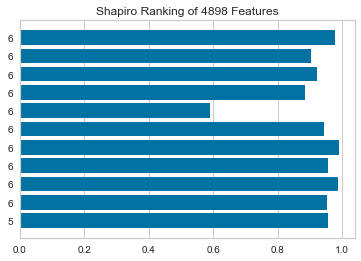

In [37]:
print("WHITE SHAPE OLD: ", X_white.shape)

# feature extraction
test_white = SelectKBest(score_func = chi2, k = 6) # selects features using chi square and selects 6 of the best features
fit_white = test_white.fit(X_white, Y_white) # Run score function on (X, Y) and get the appropriate features.
indices_white = fit_white.get_support(indices='false') # Get a mask, or integer index, of the features selected
print("\nWHITE WINE INDICES: ", indices_white)

# new dataset
X_white_new = SelectKBest(chi2, k=6).fit_transform(X_white, Y_white)
print("\nWHITE SHAPE NEW: ", X_white_new.shape)

# summarize scores 
numpy.set_printoptions(precision = 3) # sets precision to 3 numbers
print("\nWHITE FIT SCORES: ", fit_white.scores_)

# Apply the transformation to the dataset
features_white = fit_white.transform(X_white)

# Summarize selected features
print("\nFeatures WHITE: ", features_white[0:4,:])

uni_selection_white = chi2(X_white, Y_white) # MAYBE NOT NEEDED
print("\nWHITE UNIVARIATE SELECTION: ", uni_selection_white) # MAYBE NOT NEEDED

featureRanking(dataset_white, 'quality', attributes_white, labels_white)

### Principal Component Analysis

#### Prepare the data for a classification task

In [38]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set for both data sets
#X_car_train, X_car_test, Y_car_train, Y_car_test = train_test_split(X_car, Y_car, test_size=0.3, random_state=0)
#X_white_train, X_white_test, Y_white_train, Y_white_test = train_test_split(X_white, Y_white, test_size=0.3, random_state=0)

X_car_train, X_car_test, Y_car_train, Y_car_test = train_test_split(attributes_car, labels_car, test_size=0.3, random_state=0)
X_white_train, X_white_test, Y_white_train, Y_white_test = train_test_split(attributes_white, labels_white, test_size=0.3, random_state=0)


#### Normalize Features

In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_car_train_std = sc.fit_transform(X_car_train)  
X_car_test_std = sc.transform(X_car_test) 
 
X_white_train_std = sc.fit_transform(X_white_train)  
X_white_test_std = sc.transform(X_white_test)

#### Perform PCA (Car)

In [40]:
from sklearn.decomposition import PCA
 
pca_car = PCA()  # Initialize the PCA class by passing the number of components to the constructor.
X_car_train_pca = pca_car.fit_transform(X_car_train_std)  
pca_car.explained_variance_ratio_ # variance caused by each of the principal components.

array([ 0.178,  0.17 ,  0.17 ,  0.164,  0.16 ,  0.158])

#### Perform PCA (White wine)

In [41]:
pca_white = PCA()  # Initialize the PCA class by passing the number of components to the constructor. # empty all features
X_white_train_pca = pca_white.fit_transform(X_white_train_std)  
pca_white.explained_variance_ratio_ # variance caused by each of the principal components.

array([ 0.297,  0.142,  0.112,  0.095,  0.087,  0.084,  0.066,  0.054,
        0.037,  0.026,  0.001])

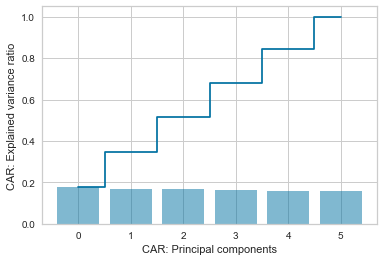

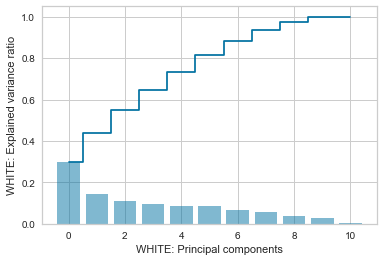

In [42]:
%matplotlib inline 
import matplotlib.pyplot as plt

#print(X_car_train_pca.shape)

# Here we can see that increasing the features more or less between 14/15 it tens to get more accuracy nearly to 100%
plt.bar(range(6), pca_car.explained_variance_ratio_, alpha=0.5, align='center')#, pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(6), numpy.cumsum(pca_car.explained_variance_ratio_), where='mid')
plt.ylabel('CAR: Explained variance ratio')
plt.xlabel('CAR: Principal components')
plt.show()

#print(X_white_train_pca.shape)

plt.bar(range(11), pca_white.explained_variance_ratio_, alpha=0.5, align='center')#, pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(11), numpy.cumsum(pca_white.explained_variance_ratio_), where='mid')
plt.ylabel('WHITE: Explained variance ratio')
plt.xlabel('WHITE: Principal components')
plt.show()

#### Dimension Reduction before classification

In [43]:
pca_car = PCA(n_components = 2) # for getting more or less of 94% of variance ratio = 13
X_car_train_pca = pca_car.fit_transform(X_car_train_std)
X_car_test_pca = pca_car.transform(X_car_test_std) # returns the specified number of principal components.
print("CAR: ", pca_car)

pca_white = PCA(n_components = 7) # for getting more or less of 93% of variance ratio = 7
X_white_train_pca = pca_white.fit_transform(X_white_train_std)
X_white_test_pca = pca_white.transform(X_white_test_std) # returns the specified number of principal components. 
print("\nWHITE: ", pca_white)

CAR:  PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

WHITE:  PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


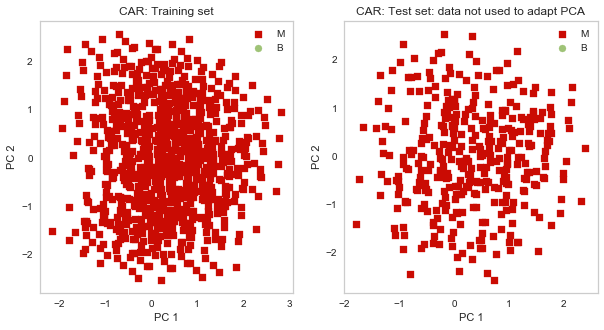

In [44]:
# Car
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure
inx=(Y_car_train == 1)
inx=inx.ravel()
ax.scatter(X_car_train_pca[inx,0], X_car_train_pca[inx,1],marker='s',color='r',label='M') 
inx=(Y_car_train == 0)
inx=inx.ravel()
ax.scatter(X_car_train_pca[inx,0],X_car_train_pca[inx,1],marker='o',color='g',label='B')    
ax.set_title("CAR: Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure
inx=(Y_car_test == 1)
inx=inx.ravel()
ax.scatter(X_car_test_pca[inx,0],X_car_test_pca[inx,1],marker='s',color='r',label='M')  
inx=(Y_car_test == 0)
inx=inx.ravel()
ax.scatter(X_car_test_pca[inx,0],X_car_test_pca[inx,1],marker='o',color='g',label='B')
    
ax.set_title("CAR: Test set: data not used to adapt PCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

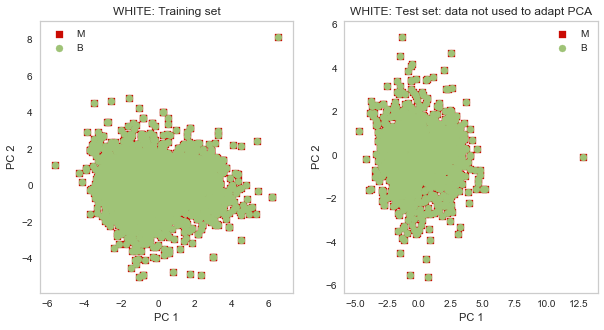

In [45]:
# WHITE WINE
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure
inx=(Y_white_train >= 1)
inx=inx.ravel()
ax.scatter(X_white_train_pca[inx,0], X_white_train_pca[inx,1],marker='s',color='r',label='M') 
inx=(Y_white_train <= 10)
inx=inx.ravel()
ax.scatter(X_white_train_pca[inx,0],X_white_train_pca[inx,1],marker='o',color='g',label='B')    
ax.set_title("WHITE: Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure
inx=(Y_white_test >= 1)
inx=inx.ravel()
ax.scatter(X_white_test_pca[inx,0],X_white_test_pca[inx,1],marker='s',color='r',label='M')  
inx=(Y_white_test <= 10)
inx=inx.ravel()
ax.scatter(X_white_test_pca[inx,0],X_white_test_pca[inx,1],marker='o',color='g',label='B')
    
ax.set_title("WHITE: Test set: data not used to adapt PCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### Kernel Principal Components

In [46]:
def applyKPCA(num_comp, kernel_type, X_train):

    from sklearn.decomposition import KernelPCA

    kpca = KernelPCA(n_components=num_comp, kernel= kernel_type, gamma=15)
    X_skpca = kpca.fit_transform(X_train)
    print("SHAPE: {}\tKERNEL: {}".format(X_skpca.shape, kernel_type))

In [47]:
applyKPCA(2, 'rbf', X_car_train_std)
applyKPCA(2, 'linear', X_car_train_std)

applyKPCA(2, 'rbf', X_white_train_std)
applyKPCA(2, 'linear', X_white_train_std)

SHAPE: (1209, 2)	KERNEL: rbf
SHAPE: (1209, 2)	KERNEL: linear
SHAPE: (3428, 2)	KERNEL: rbf
SHAPE: (3428, 2)	KERNEL: linear


# Task B: Predictive Model

- [Car: Without Data Set Standardization](#Car:-Without-Data-Set-Standardization)
- [Car: With Data Set Standardization)](#Car:-With-Data-Set-Standardization)
- [White: Without Data Set Standardization](#White:-Without-Data-Set-Standardization)
- [White: With Data Set Standardization)](#White:-With-Data-Set-Standardization)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn import svm
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

In [49]:
def applyKNN(X_train, Y_train, X_test, Y_test):
	# create classifier model
	knn = KNeighborsClassifier()

	knn.fit(X_train, Y_train)
	KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')

	predictions = knn.predict(X_test)

	score = accuracy_score(Y_test, predictions)
	print("KNN Accuracy: {:.2%}".format(score))

In [50]:
def applySVM(X_train, Y_train, X_test, Y_test, kernel_type):

	svc = svm.SVC(kernel=kernel_type, C=1.0)
	svc.fit(X_train, Y_train)
	predictions = svc.predict(X_test)
	score = accuracy_score(Y_test, predictions)
	print('SVM Accuracy {}: {:.2%}'.format(kernel_type,score))

In [51]:
def applyMLP(X_train, Y_train, X_test, Y_test):

	mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5),alpha=0.01, max_iter=5000)
	mlp.fit(X_train, Y_train)
	predictions = mlp.predict(X_test)
	score = accuracy_score(Y_test, predictions)
	print('MLP Accuracy: {:.2%}'.format(score))	

In [52]:
def applyRandomForest(X_train, Y_train, X_test, Y_test):

	forest = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=10, max_features='log2', oob_score=False)	
	
	forest.fit(X_train,Y_train)
	'''
	plot_decision_regions(X_train, Y_train, classifier=forest)
	plt.xlabel('x1')
	plt.ylabel('x2')
	plt.legend(loc='upper left')
	plt.grid()
	plt.tight_layout()
	plt.show()
	'''
	score = forest.score(X_test,Y_test)
	print('Random Forest Accuracy: {:.2%}'.format(score))	
	#print('out-of-bag \n', forest.oob_score_)
	print('Feature importance: \n',forest.feature_importances_)

In [53]:
def applyDecisionTree(X_train, Y_train, X_test, Y_test):

	from sklearn import tree

	tree = tree.DecisionTreeClassifier(criterion='gini')
	tree.fit(X_train,Y_train)
	score = tree.score(X_test,Y_test)

	print('Decision Tree Accuracy: {:.2%}'.format(score))

## Car: Without Data Set Standardization

In [54]:
applyKNN(X_car_train, Y_car_train, X_car_test, Y_car_test)
applySVM(X_car_train, Y_car_train, X_car_test, Y_car_test, 'linear')
applySVM(X_car_train, Y_car_train, X_car_test, Y_car_test, 'poly')
applySVM(X_car_train, Y_car_train, X_car_test, Y_car_test, 'rbf')
applySVM(X_car_train, Y_car_train, X_car_test, Y_car_test, 'sigmoid')
applyMLP(X_car_train, Y_car_train, X_car_test, Y_car_test)
applyDecisionTree(X_car_train, Y_car_train, X_car_test, Y_car_test)
applyRandomForest(X_car_train, Y_car_train, X_car_test, Y_car_test)

KNN Accuracy: 93.83%
SVM Accuracy linear: 83.82%
SVM Accuracy poly: 93.06%
SVM Accuracy rbf: 95.57%
SVM Accuracy sigmoid: 62.24%
MLP Accuracy: 88.82%
Decision Tree Accuracy: 97.69%
Random Forest Accuracy: 79.58%
Feature importance: 
 [ 0.106  0.046  0.002  0.36   0.07   0.416]


## Car: With Data Set Standardization

In [55]:
applyKNN(X_car_train_std, Y_car_train, X_car_test_std, Y_car_test)
applySVM(X_car_train_std, Y_car_train, X_car_test_std, Y_car_test, 'linear')
applySVM(X_car_train_std, Y_car_train, X_car_test_std, Y_car_test, 'poly')
applySVM(X_car_train_std, Y_car_train, X_car_test_std, Y_car_test, 'rbf')
applySVM(X_car_train_std, Y_car_train, X_car_test_std, Y_car_test, 'sigmoid')
applyMLP(X_car_train_std, Y_car_train, X_car_test_std, Y_car_test)
applyDecisionTree(X_car_train_std, Y_car_train, X_car_test_std, Y_car_test)
applyRandomForest(X_car_train_std, Y_car_train, X_car_test_std, Y_car_test)

KNN Accuracy: 94.22%
SVM Accuracy linear: 83.62%
SVM Accuracy poly: 85.36%
SVM Accuracy rbf: 96.34%
SVM Accuracy sigmoid: 72.06%
MLP Accuracy: 97.69%
Decision Tree Accuracy: 97.30%
Random Forest Accuracy: 84.78%
Feature importance: 
 [ 0.055  0.056  0.008  0.446  0.019  0.416]


## White: Without Data Set Standardization

In [56]:
applyKNN(X_white_train, Y_white_train, X_white_test, Y_white_test)
#applySVM(X_white_train, Y_white_train, X_white_test, Y_white_test, 'linear')
#applySVM(X_white_train, Y_white_train, X_white_test, Y_white_test, 'poly')
#applySVM(X_white_train, Y_white_train, X_white_test, Y_white_test, 'rbf')
#applySVM(X_white_train, Y_white_train, X_white_test, Y_white_test, 'sigmoid')
applyMLP(X_white_train, Y_white_train, X_white_test, Y_white_test)
applyDecisionTree(X_white_train, Y_white_train, X_white_test, Y_white_test)
applyRandomForest(X_white_train, Y_white_train, X_white_test, Y_white_test)

KNN Accuracy: 46.53%
MLP Accuracy: 50.88%
Decision Tree Accuracy: 58.44%
Random Forest Accuracy: 52.18%
Feature importance: 
 [ 0.005  0.202  0.033  0.033  0.111  0.053  0.008  0.177  0.011  0.003
  0.365]


## White: With Data Set Standardization

In [57]:
applyKNN(X_white_train_std, Y_white_train, X_white_test_std, Y_white_test)
#applySVM(X_white_train_std, Y_white_train, X_white_test_std, Y_white_test, 'linear')
#applySVM(X_white_train_std, Y_white_train, X_white_test_std, Y_white_test, 'poly')
#applySVM(X_white_train_std, Y_white_train, X_white_test_std, Y_white_test, 'rbf')
#applySVM(X_white_train_std, Y_white_train, X_white_test_std, Y_white_test, 'sigmoid')
applyMLP(X_white_train_std, Y_white_train, X_white_test_std, Y_white_test)
applyDecisionTree(X_white_train_std, Y_white_train, X_white_test_std, Y_white_test)
applyRandomForest(X_white_train_std, Y_white_train, X_white_test_std, Y_white_test)

KNN Accuracy: 54.42%
MLP Accuracy: 56.19%
Decision Tree Accuracy: 57.55%
Random Forest Accuracy: 51.63%
Feature importance: 
 [ 0.024  0.2    0.032  0.038  0.131  0.094  0.055  0.105  0.001  0.003
  0.317]


#Dataset 2: White wine quality dataset